# Predicting Bike Rental Trends Using Environmental and Seasonal Factors


Cesar, Rudraksh, Garrett
December 8, 2022

### Introduction


In this project, we will be exploring how the bike rental process is highly correlated to the environmental and seasonal settings. Different conditions like weather, temperature and time of day could have an impact on the chances of a bike being rented at an hourly rate. Hence what we want to predict is the bike rental count at an hourly rate based on environmental conditions.
 
The data set that we use is data gathered in a two year time period between 2011 and 2012 from Capital Bikeshare System, Washington D.C. USA. This dataset also includes aggregate data like hourly data, weather and seasonal data. The raw data consists of 17379 rows that each represent an hour in a day, and 17 columns that range from categorical and continuous variables like season of the year, temperature, weather conditions and count of bike rentals per hour.




In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns  
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
# import graphviz
# from sklearn.tree import export_graphviz

### Read the data

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/cesgarcia4/project2/main/hour.csv")

### Preliminary exploration

In [69]:
df.shape

(17379, 17)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [71]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [72]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


This dataset provides several categorical and continuous variables, we wanted to look into how many NA values are within the dataset.

In [73]:
df.isna().sum().sum()

0

Without any data preprocessing on our behalf, this data has no NA values. This is because the data has been heavily preprocessed as there are a few different datasets that were aggregated in order to make this one. The data sets that were combined have data on the weather, seasons, and bike rental information.

Now lest look at the number of unique values. 

In [74]:
df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

There are many columns that are categorical and continuous, but like registered, cnt, and causal each value in a row for those columns is a sum of people renting bikes.

### Data preprocessing

With this dataset already being heavily preprocessed we saw that there could be some issues with its ordinal encoding for columns, 'season', 'weathersit', 'workingdays', and 'years'. 

In [75]:
seasons = {1:'spring',2:'summer',3:'fall',4:'winter'}
df['season'] = df['season'].replace(seasons).astype(str)

weathertype= {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
df['weathersit'] = df['weathersit'].replace(weathertype).astype(str)

years = {0:"2011",1:"2012"}
df['yr'] = df['yr'].replace(years)
df = df.rename(columns={'yr': 'years', 'mnth':'months', 'hr':'hours', 'weathersit':'weather_condition', 'cnt':'count'})

workingdays = {1:'working_day',0:'Holiday'}
df['workingday'] = df['workingday'].map(workingdays)


In [76]:
df['temp'] = df['temp'] * 41
df['temp'] = df['temp'] * 9/5 + 32

We also renamed some columns in order to be more understandable when looking at graphing data. 

Columns that serve no purpose to our dataset are 'instant','dteday' as 'instant' column is just the index of every row and 'dteday' provides the date and is not important to us as we are looking at hourly data not daily.

In [77]:
df.drop(columns=['instant','dteday'],inplace=True)

These are now the columns that will be used for our data exploration.

In [78]:
df.columns

Index(['season', 'years', 'months', 'hours', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

### Data Exploration

To begin we will look at a heatmap of all the columns left after preprocessing in order to see what variables have the most correlation to one another.

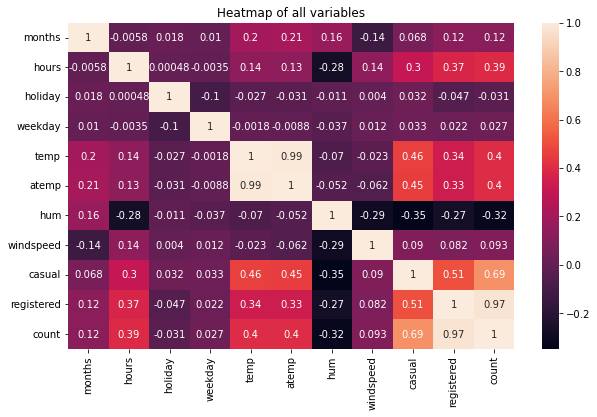

In [79]:
fig = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap of all variables');

The heatmap above shows that there are many variables that show little to no correlation those that are a darker shade of purple have a negative correlation. 

Those columns that seem to provide the most correlation are 'casual' and 'registered' with 'count'. Casual and Registered are just the count of who is a casual rider and who is a registered rider within each hour. So the strong correlation does make sense as all three variables are counts of bike rentals within each instance of the data frame.

What year had the most bike rentals?

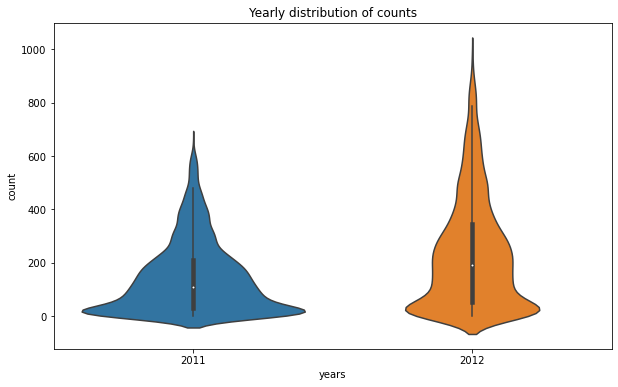

In [80]:
fig,ax=plt.subplots(figsize=(10,6))
#Violin plot for yearly distribution of counts
sns.violinplot(x='years',y='count',data=df[['years','count']])
plt.title('Yearly distribution of counts')
plt.xlabel('years')
plt.ylabel('count');

From the plot above, we can see that the bike rental count distribution in 2012 is higher than in the previous year.

Now explore information regarding the average count of bikes per hour of the day. 

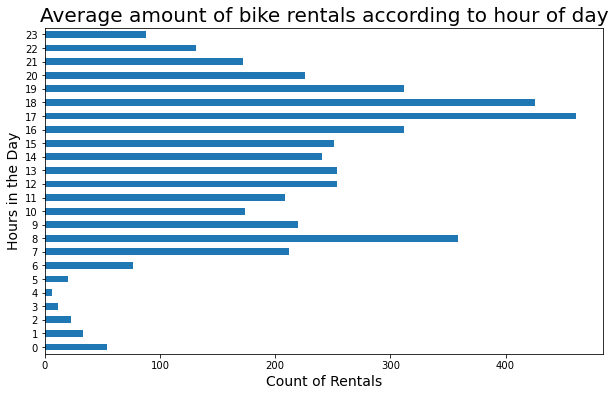

In [81]:
fig = plt.subplots(figsize = (10,6))
df.groupby('hours')['count'].mean().plot.barh()
plt.ylabel('Hours in the Day', fontsize = 14)
plt.xlabel('Count of Rentals', fontsize = 14)
plt.title('Average amount of bike rentals according to hour of day', fontsize = 20);

The figure above provides information detailing what time of day are bikes are more often rented. The hours that have the most bike rentals are 18, 19, and 8, which are 6:00 pm, 7:00 pm, and 8:00 am respectively. From the graph we can also see that after 7:00 am bikes are rented more then early morning and late at night.

Now does every month have the same distribution of hourly rental rates?

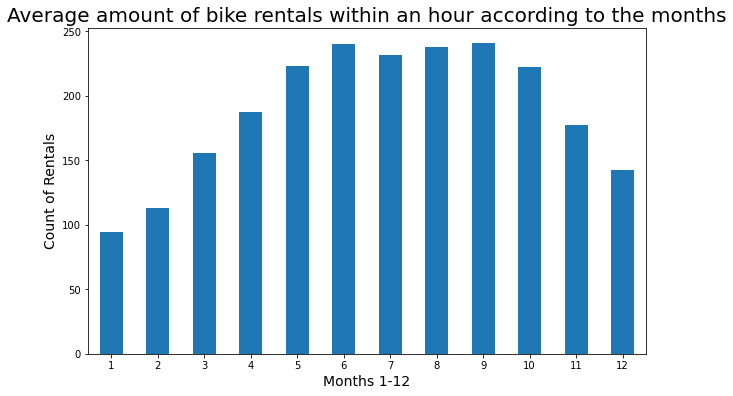

In [82]:
fig = plt.subplots(figsize = (10,6))
df.groupby('months')['count'].mean().plot.bar(rot = 0)
plt.xlabel('Months 1-12', fontsize = 14)
plt.ylabel('Count of Rentals', fontsize = 14)
plt.title('Average amount of bike rentals within an hour according to the months', fontsize = 20);

As shown in the figure above, no. Not all months have the same rate of bikes being rented per hour. At the beginning or end of the year there is less bikes being rented on average, while in months June and September are the highest average rentals per hour. 

From the plot above it can be seen that from months June to September bike rentals per hour peak. Now is this because of their respective Season?

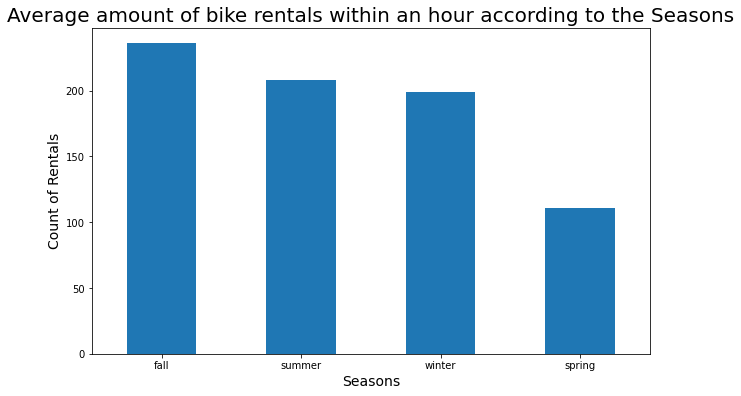

In [83]:
fig = plt.subplots(figsize = (10,6))
df.groupby('season')['count'].mean().sort_values(ascending = False).plot.bar(rot = 0)
plt.xlabel('Seasons', fontsize = 14)
plt.ylabel('Count of Rentals', fontsize = 14)
plt.title('Average amount of bike rentals within an hour according to the Seasons', fontsize = 20);

From the figure above, seasons do seem to have a role in how many bike rentals there are per hour. Fall being the with the most rentals per hour with around 235 rentals per hour and Summer at around 200 rentals per hour. Looking at the figure we can see that spring has the lowest rentals per hour at a little over 100 which is suprising to see as I would think that winter would have less rentals over all.

Could this be because of the temperature in that season?

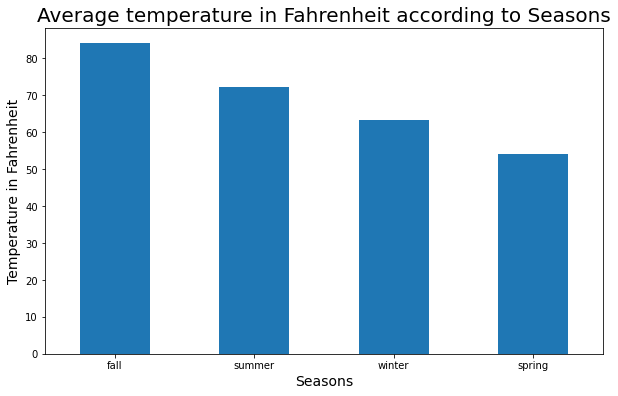

In [84]:
fig = plt.subplots(figsize = (10,6))
df.groupby('season')['temp'].mean().sort_values(ascending = False).plot.bar(rot = 0)
plt.xlabel('Seasons', fontsize = 14)
plt.ylabel('Temperature in Fahrenheit', fontsize = 14)
plt.title('Average temperature in Fahrenheit according to Seasons', fontsize = 20);

The figure above shows that every season has different temperatures. As the seasons in different parts of the world are different it is incorrect to assume just because it is winter/fall some where else that it is colder. Going back to the figure before this one, there were more bikes rented per hour when it was warmer then when it was colder. Hence why this graph and the one before have similar shapes.

Now we will look at the average temperature daily on an hourly basis. 

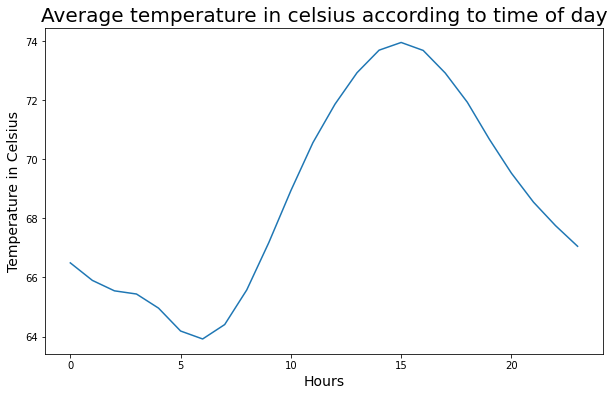

In [85]:
fig = plt.subplots(figsize = (10,6))
df.groupby('hours')['temp'].mean().plot()
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Temperature in Celsius', fontsize = 14)
plt.title('Average temperature in celsius according to time of day', fontsize = 20);

From the figure above, this should be general information to everyone that in the afternoon temperatures are higher than in the morning or at night. But does this reflect the same when looking at the bikes rented per hour?

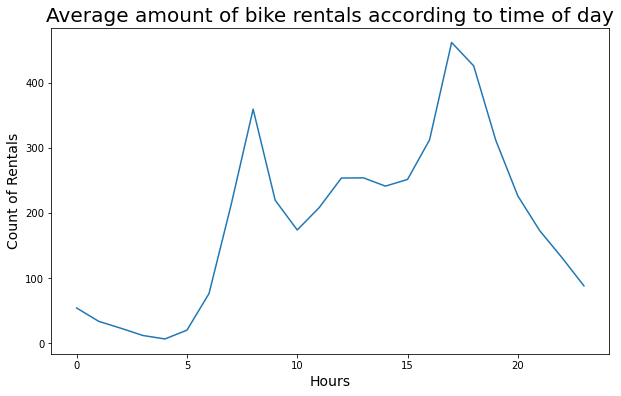

In [86]:
fig = plt.subplots(figsize = (10,6))
df.groupby('hours')['count'].mean().plot()
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Count of Rentals', fontsize = 14)
plt.title('Average amount of bike rentals according to time of day', fontsize = 20);


The figure above is to show the peaks at different times of the day when there are more bikes rented on average. At around 8:00 am there is a high average of bike rental per hour, this could be by people that rent them for daily usage to commute around Washington D.C.

What time of day do registered riders typically ride bikes?

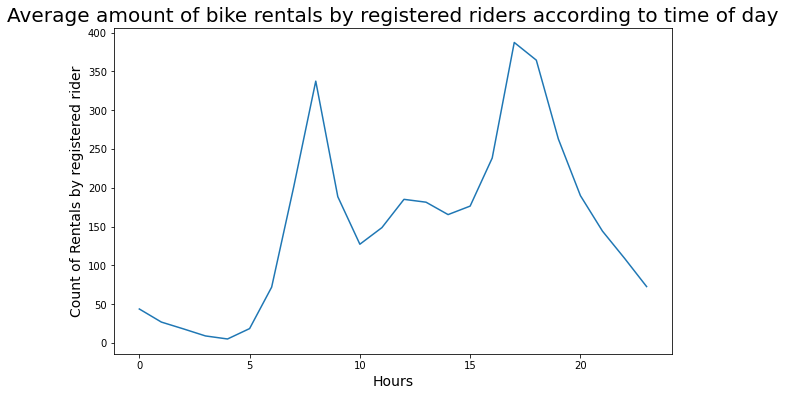

In [87]:
fig = plt.subplots(figsize = (10,6))
df.groupby('hours')['registered'].mean().plot()
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Count of Rentals by registered rider', fontsize = 14)
plt.title('Average amount of bike rentals by registered riders according to time of day', fontsize = 20);

According to the figure above there seems to be a correlation with registered riders and the time of day when being rented. It is similar to the figure before this that shows the average amount of bike rentals according to time of day. Which can further confirm that people rent them for daily usage to commute around in Washington D.C.

What time of day do casual riders typically ride bikes?

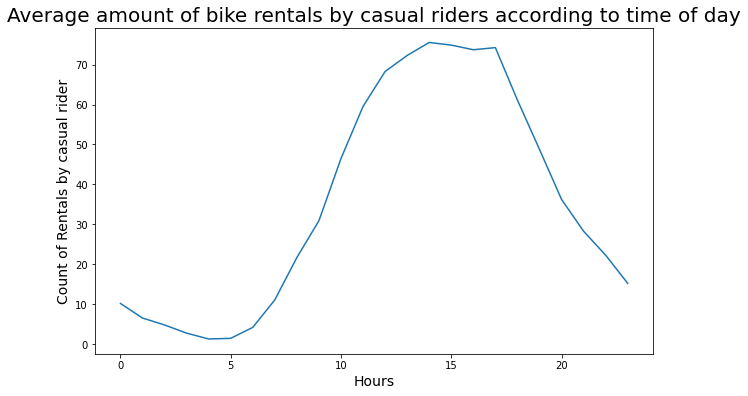

In [88]:
fig = plt.subplots(figsize = (10,6))
df.groupby('hours')['casual'].mean().plot()
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Count of Rentals by casual rider', fontsize = 14)
plt.title('Average amount of bike rentals by casual riders according to time of day', fontsize = 20);

Now this figure is similar to the figure above that shows average temperature in fahrenheit according to time of day. When looking at this graph and comparing to the graph mentioned, we can see that casual bike rentals happen more commonly when the temperature is higher. 

After looking at weather temperature has some form of correlation with hourly rental rates of a bike and whether a biker would be a registered user or not.



What are the different weather conditions that affect bikers at an hourly basis?

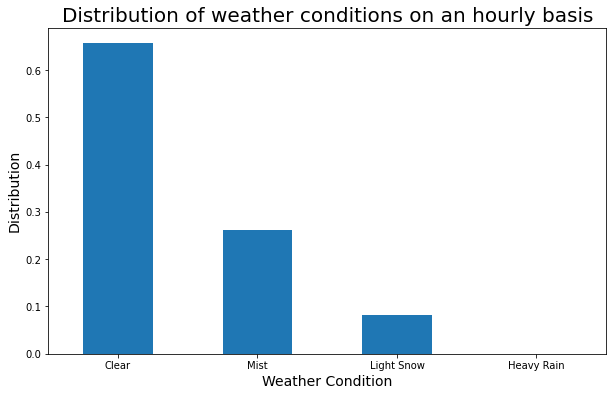

In [89]:
fig = plt.subplots(figsize = (10,6))
df['weather_condition'].value_counts(normalize = True).plot.bar(rot = 0)
plt.title('Distribution of weather conditions on an hourly basis', fontsize = 20)
plt.xlabel('Weather Condition', fontsize = 14)
plt.ylabel('Distribution', fontsize = 14);

From the figure above there are more recorded clear hours than mist, light snow, heavy rain weather conditons. This can be because a majority amount of time people may look to ride bikes in clear conditions,

What is the distribution fo weather conditions by season?

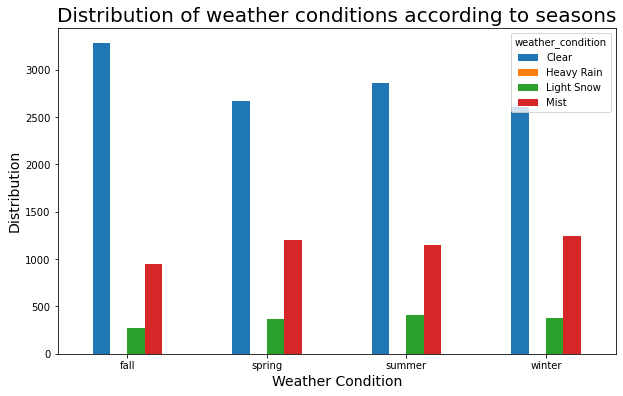

In [90]:
pd.crosstab(df['season'],df['weather_condition']).plot.bar(rot = 0,figsize = (10,6))
plt.title('Distribution of weather conditions according to seasons', fontsize = 20)
plt.xlabel('Weather Condition', fontsize = 14)
plt.ylabel('Distribution', fontsize = 14);

When observing the plot above we can see that there are not many bikes being rented when there is heavy rain even across every season. 

### Preprocessing for Machine Learning

Before we get into machine learning we will look once more at our columns and determine what would be beneficial to our models that we will be using, those being Linear Regression, KNN Regression and Desicion Tree Regression.

In [91]:
df.columns

Index(['season', 'years', 'months', 'hours', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

From the list of columns above we believe that the casual and registered columns will not provide much for our models. The reason for this is that the values in those columns are just the amount of either casual or registered and will not serve much of a purpose in predicting the bike rental count per hour according to the weather conditions.

From the list above we also think that serve little to no purpose in the question we are trying to solve and will not be benifitial to our models are holiday, and working day. 

This is why we will be dropping the columns from this point foward.

In [92]:
df.drop(columns=['casual','registered', 'holiday', 'workingday'],inplace=True)

Next, there are a few columns that are in nominal and ordinal encoding, and in order for our models to be able to use these columns we will make dummy variables for them. The columns that need this are season and weather_condition. 

In [93]:
df = pd.get_dummies(df, columns=['season', 'weather_condition'])

In [94]:
target = 'count'
#predictors = ['months', 'hours','temp', 'hum', 'windspeed', 'season']
predictors = list(df.columns)
predictors.remove(target)
X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


Our next step was to apply standard scaling. 

In [95]:
# Create a Z-scaler object
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

By scaling the data, we can help the model converge faster and improve its performance.

Now before we begin to explore with different models we will calculate the baseline RMSE, in order to have a reference point going forward. 

In [96]:
#Baseline RMSE 
baseline_prediction=y_train.mean()
mse=((baseline_prediction - y_test)**2).mean()
rmse = np.sqrt(mse)
rmse = rmse.round(3)
print("Baseline RMSE:", rmse)

Baseline RMSE: 181.769


In order for our models to be effective the minimum RMSE they need to be is 181.769

### Machine learning

#### Linear Regression

Now to begin we will try to 

In [97]:
lregressor = LinearRegression()
lregressor.fit(X_train, y_train)

LinearRegression()

What is the comparison between train RMSE, test RMSE, and baseline RSME? 

In [98]:
#train RMSE for linear regression
y_pred_ln = lregressor.predict(X_train)
mse=((y_pred_ln - y_train)**2).mean()
rmse = np.sqrt(mse).round(3)
print("Linear Regression Train RMSE:", rmse)
#test RMSE for linear regression
y_pred_ln=lregressor.predict(X_test)
mse=((y_pred_ln - y_test)**2).mean()
rmse = np.sqrt(mse).round(3)
print("Linear Regression Test RMSE:", rmse)

Linear Regression Train RMSE: 141.072
Linear Regression Test RMSE: 140.013


As expected the test RMSE is lower than that of the training data and the linear regression model is effective as the test error is lower than the baseline error.

Now we will try to improve the linear regression model by selecting the best 10 features.

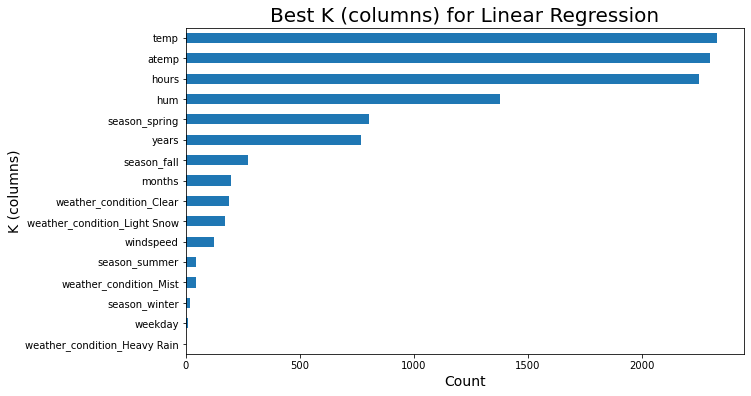

In [99]:
#Feature Selection
fig = plt.subplots(figsize = (10,6))
kbest = SelectKBest(f_regression, k=10)
kbest.fit(X_train, y_train)
selected_features = kbest.get_support()
X_train_best = X_train[:, selected_features]
X_test_best = X_test[:, selected_features]
selected_features = kbest.get_support()
pd.Series(kbest.scores_, index=predictors).sort_values().plot.barh()
plt.xlabel("Count" ,fontsize = 14)
plt.ylabel("K (columns)", fontsize = 14)
plt.title("Best K (columns) for Linear Regression",  fontsize = 20);

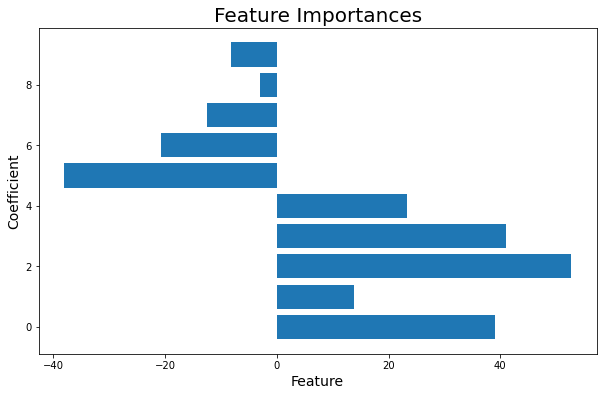

In [100]:
fig = plt.subplots(figsize = (10,6))
lreg = LinearRegression()
lreg.fit(X_train[:, selected_features], y_train)
feature_names = list(X_train[:, selected_features])
predictions = lreg.predict(X_test[:, selected_features])
coefs = lreg.coef_
plt.barh(range(len(coefs)), coefs)
plt.xlabel("Feature" ,fontsize = 14)
plt.ylabel("Coefficient", fontsize = 14)
plt.title("Feature Importances",  fontsize = 20);

The figure above shows the best features for our target. Temperature being the best feature. With the bar graph showing features and their ceofficients.

Now we reinstate the linear regressor model that uses best 10 features. 

In [101]:
KBLregressor = LinearRegression()
KBLregressor.fit(X_train_best, y_train)

LinearRegression()

Now do the RMSE values of the training data and test data from the linear regressoion model that uses best 10 features show improvement compared to the inital linear regression model?

In [102]:
y_pred_ln = KBLregressor.predict(X_train_best)
mse=((y_pred_ln - y_train)**2).mean()
rmse = np.sqrt(mse).round(3)
print("Linear Regression train RMSE with best 10 features:", rmse)


y_pred_ln=KBLregressor.predict(X_test_best)
mse=((y_pred_ln - y_test)**2).mean()
rmse = np.sqrt(mse).round(3)
print("Linear Regression test RMSE with best 10 features:", rmse)

Linear Regression train RMSE with best 10 features: 141.538
Linear Regression test RMSE with best 10 features: 140.302


There is not improvement to compared to the previous linear regression model used. The reason for this is that selecting the best features for a linear regression model does not always guarantee that the model's performance will improve. There can be many reasons to why it did not improve but we assume that it may be because linear regression might not be best suited for this dataset.



Now we will do grid search for linear regression.

In [103]:
param_grid = {
    'fit_intercept': [True, False]
}

lreg_grid_search = GridSearchCV(KBLregressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
lreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

Now we will plot the learning curve.

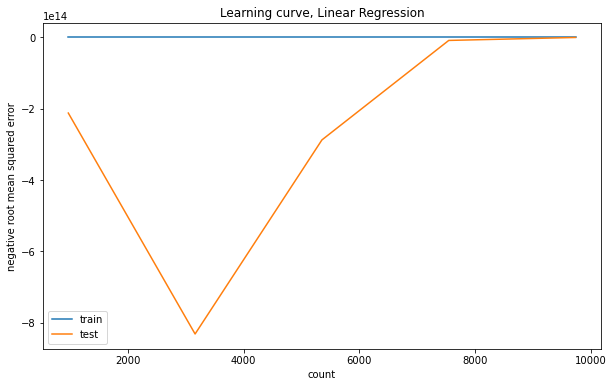

In [104]:
fig = plt.subplots(figsize = (10,6))
train_sizes, train_scores, test_scores = learning_curve(lreg_grid_search.best_estimator_, X_train, y_train, cv=5,scoring='neg_root_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve, Linear Regression')
plt.xlabel('count')
plt.ylabel('negative root mean squared error')
plt.legend()
plt.show();

As the count increased the test error got closer to that of the trainig data. 

#### K-Nearest Neighbors

Now we will be looking at K-Nearest Neighbors model to compare with the previous linear regression models. 

In [105]:
knnreg = KNeighborsRegressor()
knnreg.fit(X_train, y_train)

KNeighborsRegressor()

What is the comparison between train RMSE, test RMSE, and baseline RSME? 

In [106]:
train_predictions = knnreg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions)).round(3)
print("KKN Train RMSE:", train_rmse)

test_predictions = knnreg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions)).round(3)
print("KNN Test RMSE:", test_rmse)

KKN Train RMSE: 89.071
KNN Test RMSE: 112.511


Similar to the Linear Regression models done before RMSE is lower than the baseline. But this time around the training data had lower RSME than the test. Even with the training data having less error, the RMSE is lower using KNN than Linear Regression. The most probable issue causing this is underfitting or KNN with the dataset.

Now we will determine the best K for KNN in order to try and improve our RSME for training and test data.

In [107]:
knnreg = KNeighborsRegressor()
params = {"n_neighbors" : range(1,22)}
KnnCV = GridSearchCV(knnreg,params, cv=10, scoring = 'neg_root_mean_squared_error')
KnnCV.fit(X_train_best, y_train)
print("Best K:", KnnCV.best_params_["n_neighbors"]);

Best K: 5


As shown above the best K for this data is 5.

Now we will plot a learning curve that uses negative root mean squared error.

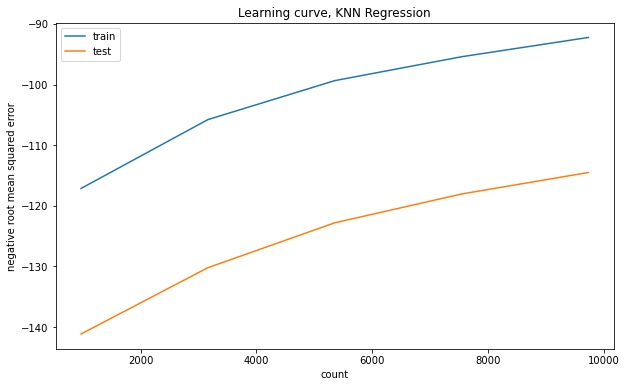

In [108]:
fig = plt.subplots(figsize = (10,6))
train_sizes, train_scores, test_scores = learning_curve(KnnCV.best_estimator_, X_train, y_train, cv=5,scoring='neg_root_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve, KNN Regression')
plt.xlabel('count')
plt.ylabel('negative root mean squared error')
plt.legend()
plt.show();

When observing this learning curve we can see that the test data did do better than that of the test data even when using the best k.

Now using k=5 we will see what our RSME is and compare to the previous knn model before this one.

In [109]:
y_pred = KnnCV.predict(X_train_best)
train_RMSE=np.sqrt(((y_pred - y_train)**2).mean())
print('Train RMSE:',train_RMSE)

y_pred = KnnCV.predict(X_test_best)
rmse = np.sqrt(((y_pred - y_test)**2).mean())
print('Test RMSE:',rmse)

Train RMSE: 81.48481092717364
Test RMSE: 103.21518210344584


Using the best K there were some improvemnets to the RMSE in both the training and test data. But there is still the issue that the test RMSE has more error than the training.

#### Decision Tree Regression

Our final model will be using decision tree regression in order to compare with linear regression and K-Nearest Neighbors models.

In [110]:
# Decision Tree
treereg = DecisionTreeRegressor(random_state = 0)
treereg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

Similar to the previous models we will compare training data RMSE and test data RMSE

In [111]:
train_predictions = treereg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions)).round(3)
print("KKN Train RMSE:", train_rmse)

test_predictions = treereg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions)).round(3)
print("KNN Test RMSE:", test_rmse)

KKN Train RMSE: 0.319
KNN Test RMSE: 71.145


The test RMSE is lower than previous models but the same issue as with KNN resides where training RMSE is lower than the test RMSE

Now we will be looking at the decision plot.

We will now gridsearch the tree model and see the learning curve after.

In [112]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5, 7],
}

model = DecisionTreeRegressor()
tree_grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
tree_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 3, 5, 7]},
             scoring='neg_mean_absolute_error')

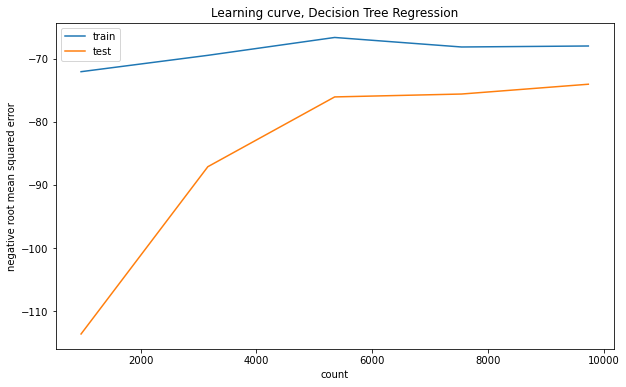

In [113]:
fig = plt.subplots(figsize = (10,6))
train_sizes, train_scores, test_scores = learning_curve(tree_grid_search.best_estimator_, X_train, y_train, cv=5,scoring='neg_root_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve, Decision Tree Regression')
plt.xlabel('count')
plt.ylabel('negative root mean squared error')
plt.legend()
plt.show();

#### Unsupervised Learning anomaly detection

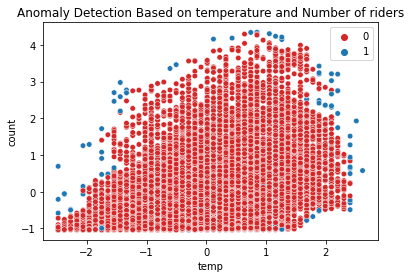

In [114]:
features = ['temp', 'count']
df[features] = StandardScaler().fit_transform(df[features])
X = df[features].values
clf = LocalOutlierFactor(n_neighbors=35)
clf.fit(X)
factor = -clf.negative_outlier_factor_
threshold = np.quantile(factor, 0.99)
outliers = (factor > threshold).astype(int)
sns.scatterplot(x=features[0], y=features[1], data=df, s=30,
hue=outliers, palette=['tab:red', 'tab:blue'])
plt.title('Anomaly Detection Based on temperature and Number of riders');

We wanted to use Unsupervised Learning to find some days where the using the numbers of riders at different temperatures were unusual. in the graph blue means it was a anomaly in the Top 1% of of outliers in the data. red means that it was a normal amount of people based on temperature. some interesting points we can see is some times when the temperature was pretty low we expected to see not many riders but we see more riders and the same goes for some days where it was a hot day and still we have alot of riders.

### Conclusion

In conclusion, the analysis of bike rental data in relation to environmental and seasonal factors showed that there are strong relationships between these variables and the number of bike rentals at an hourly rate. The model built using this data was able to predict bike rental trends, indicating that environmental and seasonal conditions do have an impact on bike rental patterns. At the end we were able to see that decision tree regression have the more accurate and detailed prediction than the other models with the lowest rmse of test cases at around 70. Even trying some unsupervised anomaly detection that showed outliers based on count of riders and temperature of that hour.